In [0]:
import numpy as np
import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


survival:    Survival

PassengerId: Unique Id of a passenger.

pclass:    Ticket class
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation


In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


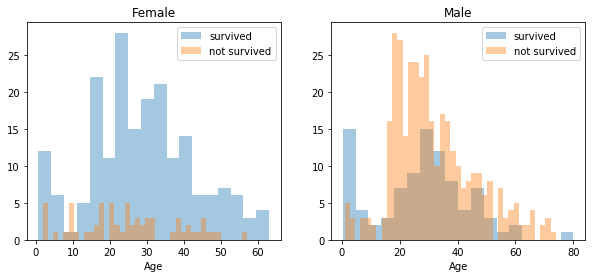

In [0]:
#Age and Sex
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), \
                  bins=18, label=survived, ax = axes[0], kde = False)

ax = sns.distplot(women[women['Survived']==0].Age.dropna(), \
                  bins=40, label=not_survived, ax = axes[0], kde = False)


ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), \
                 bins=18, label=survived, ax = axes[1], kde = False)

ax = sns.distplot(men[men['Survived']==0].Age.dropna(), \
                 bins=40, label=not_survived, ax = axes[1], kde = False)

ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


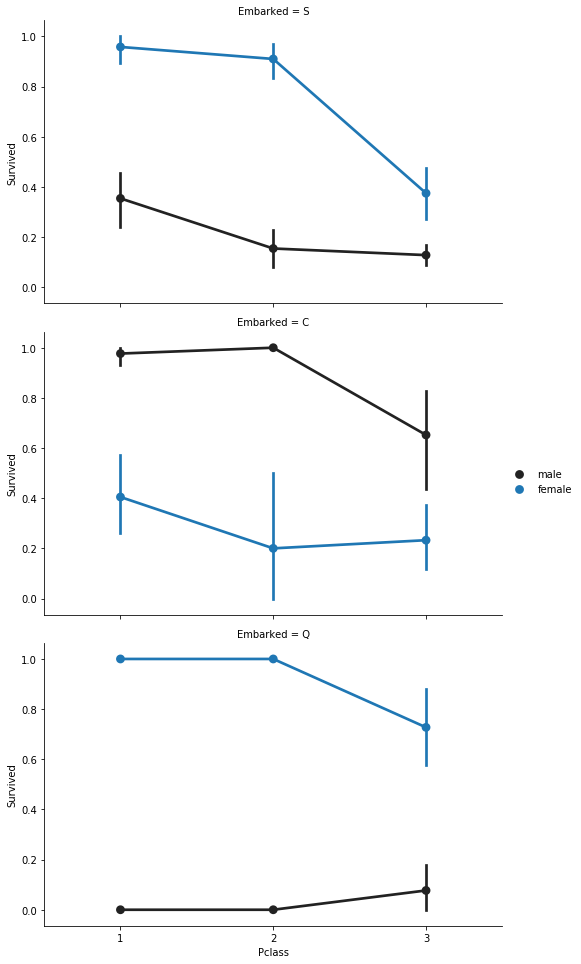

In [0]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked',size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass','Survived','Sex',\
              palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

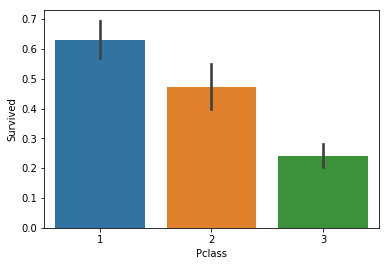

In [0]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


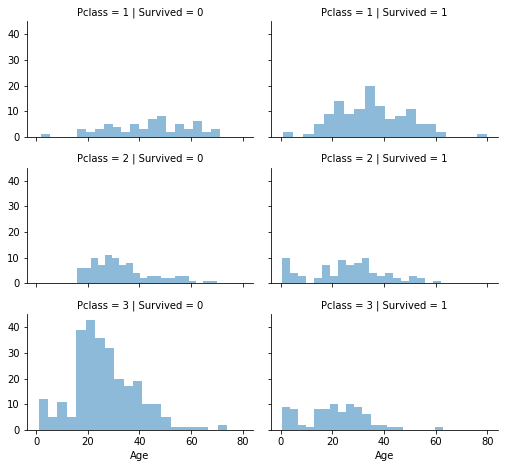

In [0]:
grid = sns.FacetGrid(train_df,col = 'Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [0]:
data = [train_df, test_df]
for dataset in data:
  dataset['relatives']=dataset['SibSp']+dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)
  
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


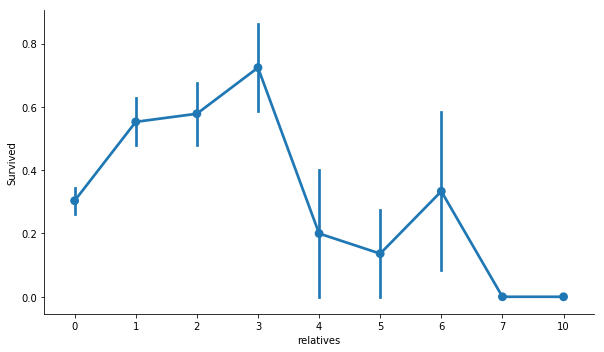

In [0]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 1.7,)

In [0]:
train_df=train_df.drop(['PassengerId'], axis=1)

In [0]:
#Cabin

import re
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'U':8}
data = [train_df, test_df]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna('U0')
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)
  

# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [0]:
#Age

data = [train_df, test_df]

for dataset in data:
  mean = dataset['Age'].mean()
  std = dataset['Age'].std()
  is_null = dataset['Age'].isnull().sum()
  
  rand_age = np.random.randint(mean-std, mean+std, size = is_null)
  
  age_slice = dataset['Age'].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset['Age'] = age_slice
  dataset['Age'] = dataset['Age'].astype(int)

train_df['Age'].isnull().sum()

0

In [0]:
#Grouping Age
data = [train_df, test_df]
for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18),  'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22),  'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27),  'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33),  'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40),  'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66),  'Age'] = 6
  dataset.loc[(dataset['Age'] > 66),  'Age'] = 7
  
train_df['Age'].value_counts()

4    165
6    160
3    138
5    137
2    120
1     96
0     68
7      7
Name: Age, dtype: int64

In [0]:
#Embarked
train_df['Embarked'].describe();

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
  
ports = {'S':0, 'C':1, 'Q':2}
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)

In [0]:
#Fare
data = [train_df, test_df]

# Heandling Missing Values
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
#  dataset['Fare'] = dataset['Fare'].astype(int)
  
# Categorize Fare
for dataset in data:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
  dataset.loc[(dataset['Fare'] > 250), 'Fare'] = 5
  dataset['Fare'] = dataset['Fare'].astype(int)
  
  
  

In [0]:
#Name
data = [train_df, test_df]
titles = {'Mr':1, 'Miss': 2, 'Mrs':3, 'Master':4, 'Rare': 5}

for dataset in data:
  # extract titles
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  dataset['Title'] = dataset['Title'].replace(['Lady',\
                                              'Countess','Capt','Col','Don',\
                                              'Dr','Major','Rev','Sir','Johkheer',\
                                              'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  
  #convert titles into numbers
  dataset['Title'] = dataset['Title'].map(titles)
  
  
  #filling NaN with 0, to get safe
  dataset['Title'] = dataset['Title'].fillna(0)
  dataset['Title'] = dataset['Title'].astype(int)
  
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'],axis=1)

In [0]:
#Sex
genders = {'male':0, 'female':1}
data = [train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

In [0]:
#Ticket
train_df['Ticket'].describe()
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [0]:
#New features

data = [train_df, test_df]

#Age times Class
for dataset in data:
  dataset['Age_Class'] = dataset['Age']*dataset['Pclass']
  
#Fare per Person
for dataset in data:
  dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
  dataset['Fare_Per_Person'] =dataset['Fare_Per_Person'].astype(int)
  


In [0]:
## Building Machine Learning Models

X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']

X_test = test_df.drop('PassengerId', axis=1).copy()

In [0]:
#Stochastic Gradient Descent (SGD)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) *100, 2)
acc_sgd

79.12

In [0]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train)* 100, 2)
acc_random_forest

92.93

In [0]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.59

In [0]:
# K Nearest Neighbor (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

86.53

In [0]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.67

In [0]:
#Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train)* 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


82.04

In [0]:
#Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.93

In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.93

In [0]:
result_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', \
             'Random Forest', 'Naive Bayes','Perceptron','Stochastic Gradient Decent',\
             'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, \
             acc_perceptron, acc_sgd, acc_decision_tree]
})

result_df = result_df.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.93,Random Forest
92.93,Decision Tree
86.53,KNN
82.04,Perceptron
81.93,Support Vector Machines
81.59,Logistic Regression
79.12,Stochastic Gradient Decent
77.67,Naive Bayes


In [0]:
#K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = 'accuracy')

print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.82222222 0.83333333 0.70786517 0.82022472 0.86516854 0.86516854
 0.80898876 0.7752809  0.85393258 0.86363636]
Mean: 0.8215821132675065
Standard Deviation: 0.046892374507698106


In [0]:
#Feature importances 

importances = pd.DataFrame({'feature': X_train.columns,\
                          'importance':np.round(random_forest.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.head(15)

,importance
feature,
Title,0.189
Sex,0.182
Age_Class,0.101
Pclass,0.084
Age,0.081
Deck,0.081
Fare,0.062
relatives,0.056
Embarked,0.050


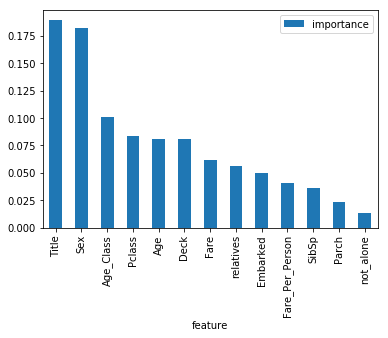

In [0]:
importances.plot.bar()

In [0]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

#out-of-bag samples

print('oob score:', round(random_forest.oob_score_, 4)*100)

oob score: 81.37


In [0]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'],\
              'min_samples_leaf':[1,5,10],\
              'min_samples_split':[2,4,10],
              'n_estimators':[100,400,700,1000]
             }

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'crit

In [0]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 700}

In [0]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=700, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.05 %


# Evaluation Methods


In [0]:
#Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)


array([[489,  60],
       [ 91, 251]])

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision:', precision_score(Y_train, predictions))
print('Recall:', recall_score(Y_train, predictions))
print('F1 Score:', f1_score(Y_train, predictions))

Precision: 0.8070739549839229
Recall: 0.7339181286549707
F1 Score: 0.7687595712098009


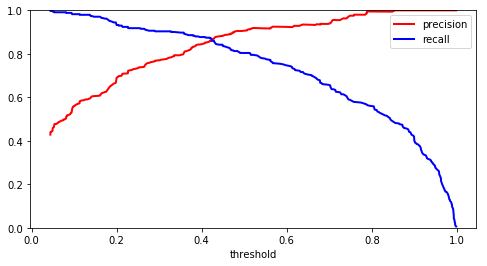

In [0]:
from sklearn.metrics import precision_recall_curve

#getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
  plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=2)
  plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=2)
  
  plt.xlabel('threshold', fontsize=10)
  plt.legend(loc="upper right", fontsize=10)
  plt.ylim([0,1])
  
plt.figure(figsize=(8,4))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


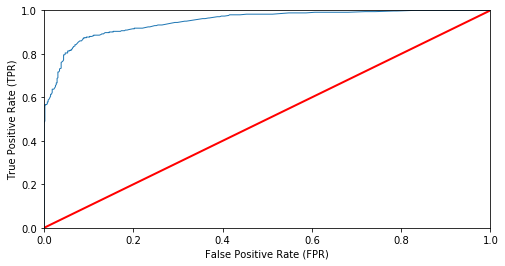

In [0]:
#Plotting ROC Curve

from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
  plt.plot(false_positive_rate, true_positive_rate, linewidth=1, label=label)
  plt.plot([0,1], [0,1], 'r', linewidth=2)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate (FPR)', fontsize=10)
  plt.ylabel('True Positive Rate (TPR)', fontsize=10)
  
  
plt.figure(figsize=(8,4))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.949746482173862


## Applying LightGBM on Titanic

In [0]:
#Building Dataset

from sklearn.model_selection import train_test_split
import lightgbm as lgbm

XL_train, XL_test, YL_train, YL_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

train_data = lgbm.Dataset(data=XL_train, label=YL_train, free_raw_data=False)
test_data = lgbm.Dataset(data=XL_test, label=YL_test, free_raw_data=False)

final_train_set = lgbm.Dataset(data=X_train, label=Y_train, free_raw_data=False)

In [0]:
#Define Parameters

lgbm_params = {
    'boosting':'dart', #dart (drop out trees) often performs better
    'application':'binary', # Binary classification
    'learning_rate':0.05, # Learning rate, controls size of gradient descent step
    'min_data_in_leaf': 20, #Data set is quite small so reduce this a bit
    'feature_fraction': 0.7, # Proportion of features in each boost, controls overfitting
    'num_leaves': 41, #Controls size of tree since LGBM uses leaf wise split
    'metric':'binary_logloss', #Area under ROC curve as the evaluation metric
    'drop_rate':0.15

}

In [0]:
#Train the model
evaluation_results = {}

clf = lgbm.train(train_set = train_data,
                params = lgbm_params,
                valid_sets = [train_data, test_data],
                valid_names=['Train','Test'],
                evals_result = evaluation_results,
                num_boost_round=500,
                early_stopping_rounds=100,
                verbose_eval=20)

optimum_boost_rounds = clf.best_iteration

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[20]	Train's binary_logloss: 0.47277	Test's binary_logloss: 0.492602
[40]	Train's binary_logloss: 0.411205	Test's binary_logloss: 0.441306
[60]	Train's binary_logloss: 0.399566	Test's binary_logloss: 0.435022
[80]	Train's binary_logloss: 0.385987	Test's binary_logloss: 0.430707
[100]	Train's binary_logloss: 0.382729	Test's binary_logloss: 0.42868
[120]	Train's binary_logloss: 0.373294	Test's binary_logloss: 0.426095
[140]	Train's binary_logloss: 0.363996	Test's binary_logloss: 0.41918
[160]	Train's binary_logloss: 0.367373	Test's binary_logloss: 0.417974
[180]	Train's binary_logloss: 0.349061	Test's binary_logloss: 0.409699
[200]	Train's binary_logloss: 0.336982	Test's binary_logloss: 0.409468
[220]	Train's binary_logloss: 0.330604	Test's binary_logloss: 0.409155
[240]	Train's binary_logloss: 0.320779	Test's binary_logloss: 0.407994
[260]	Train's binary_logloss: 0.315198	Test's binary_logloss: 0.410483
[280]	Train's binary_logloss: 0.309083	Test's binary_logloss: 0.41192
[300]	Train's 

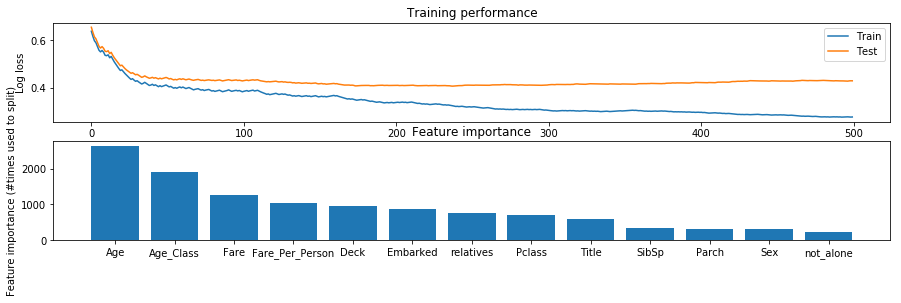

In [0]:
#Visualise training performance

fig, axs = plt.subplots(2,1, figsize=[15,4])

#Plot the log loss during training
axs[0].plot(evaluation_results['Train']['binary_logloss'], label='Train')
axs[0].plot(evaluation_results['Test']['binary_logloss'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

#Plot feature importance
importances = pd.DataFrame({'features': clf.feature_name(),
                           'importance': clf.feature_importance()}).sort_values('importance',ascending=False)

axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (#times used to split)')
axs[1].set_title('Feature importance')

plt.show()

In [0]:
#Examine model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


preds = np.round(clf.predict(XL_test))
print('Accuracy = \t {}'.format(accuracy_score(YL_test, preds)))
print('Precision = \t {}'.format(precision_score(YL_test, preds)))
print('Recall = \t {}'.format(recall_score(YL_test, preds)))
print('F1 Score = \t {}'.format(f1_score(YL_test, preds)))
r_a_score = roc_auc_score(YL_test, preds)
print("ROC-AUC-Score:", r_a_score)

Accuracy = 	 0.8770949720670391
Precision = 	 0.8823529411764706
Recall = 	 0.8108108108108109
F1 Score = 	 0.8450704225352113
ROC-AUC-Score: 0.8673101673101675


In [0]:
#K_fold LightGBM
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

folds = KFold(n_splits=5, shuffle=True, random_state=123)

oof_preds = np.zeros(X_train.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X_train)):
  trn_x, trn_y = X_train.iloc[trn_idx], Y_train.iloc[trn_idx]
  val_x, val_y = X_train.iloc[val_idx], Y_train.iloc[val_idx]
  
  clf = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.1,
        num_leaves=123,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=15,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
    )
  
  clf.fit(trn_x, trn_y, 
            eval_set= [(trn_x, trn_y), (val_x, val_y)], 
            eval_metric='auc', verbose=250, early_stopping_rounds=150
           )
  
  oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
  print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
  
print('Full AUC score %.6f' % roc_auc_score(Y_train, oof_preds))   

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[10]	training's auc: 0.899813	training's binary_logloss: 0.450109	valid_1's auc: 0.916262	valid_1's binary_logloss: 0.43179
Fold  1 AUC : 0.916262
Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[19]	training's auc: 0.918759	training's binary_logloss: 0.375495	valid_1's auc: 0.87226	valid_1's binary_logloss: 0.412931
Fold  2 AUC : 0.872260
Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[33]	training's auc: 0.926935	training's binary_logloss: 0.336073	valid_1's auc: 0.875888	valid_1's binary_logloss: 0.409987
Fold  3 AUC : 0.875888
Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[19]	training's auc: 0.925683	training's binary_logloss: 0.366144	valid_1's auc: 0.814072	valid_1's binary_logloss: 0.467239
Fold  4 AUC : 0.814072
Training until val